<a href="https://colab.research.google.com/github/aezamor3/MAT421/blob/main/MAT%20421%20Module%20H%20Homework%202%20April%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function 𝑚𝑦_𝑙𝑜𝑟𝑒𝑛𝑧_𝑠𝑜𝑙𝑣𝑒𝑟(𝑡_𝑠𝑝𝑎𝑛,𝑠0,𝑠𝑖𝑔𝑚𝑎,𝑟ℎ𝑜,𝑏𝑒𝑡𝑎) that solves the Lorenz equations using 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝, the function returns [T, X, Y, Z]. The input argument 𝑡_𝑠𝑝𝑎𝑛 should be a list of the form [𝑡0,𝑡𝑓], where 𝑡0 is the initial time, and 𝑡𝑓 is the final time of consideration. The input argument 𝑠0 should be a (3,) array of the form [𝑥0;𝑦0;𝑧0], where (𝑥0,𝑦0,𝑧0) represents an initial position. Finally, the input arguments 𝑠𝑖𝑔𝑚𝑎, 𝑟ℎ𝑜, and 𝑏𝑒𝑡𝑎 are the scalar parameters 𝜎,𝜌, and 𝛽 of the Lorenz system. The output arguments 𝑇 should be an array of times given as the output argument of 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝. The output arguments, 𝑋, 𝑌, and 𝑍 should be the numerically integrated solution produced from 𝑚𝑦_𝑙𝑜𝑟𝑒𝑛𝑧 in the previous problem and 𝑠𝑜𝑙𝑣𝑒_𝑖𝑣𝑝.

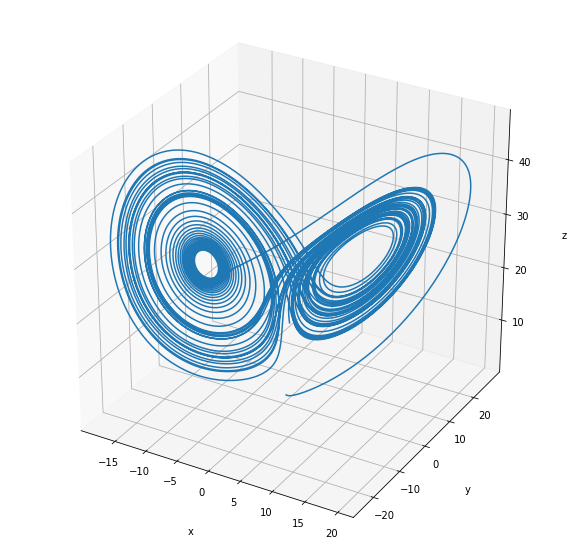

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
  s = np.array([1, 2, 3])
  def my_lorenz (t, S, sigma, beta, rho):
    x, y, z = S
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    dS = [dx, dy, dz]
    return dS
  dS = my_lorenz(0, s, 10, 28, 8 / 3)
  t0 = t_span[0]
  tf = t_span[1]
  t = np.linspace(t0, tf, 20001)
  f = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)
  sol = solve_ivp(f, t_span, s0, t_eval=t)
  T, X, Y, Z = sol.t, sol.y[0, :], sol.y[1, :], sol.y[2, :]    
  return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()